In [1]:
import pandas as pd


# File paths
file_paths = {
    "Wind Speed at 10 Meters": "Wind Speed at 10 Meters.csv",
    "Surface Pressure": "Surface Pressure.csv",
    "Precipitation": "Precipitation.csv",
    "Relative Humidity at 2 Meters": "Relative Humidity at 2 Meters.csv",
    "Temperature at 2 Meters Minimum": "Temperature at 2 Meters Mini.csv",
    "Temperature at 2 Meters Maximum": "Temperature at 2 Meters Max.csv",
    "Wind Speed at 2 Meters": "Wind Speed at 2 Meters.csv",
}

def read_clean_csv(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        lines = file.readlines()
    
    # Find the index where the actual data starts
    for i, line in enumerate(lines):
        if "-END HEADER-" in line:
            data_start_index = i + 1  # The next line contains column headers
            break
    
    # Read the actual data into a DataFrame
    return pd.read_csv(file_path, skiprows=data_start_index)

# Reading all cleaned CSV files
dfs = {name: read_clean_csv(path) for name, path in file_paths.items()}

# Merging dataframes on common columns (assuming they share a common time-related column)
merged_df = None
for name, df in dfs.items():
    if merged_df is None:
        merged_df = df
    else:
        merged_df = merged_df.merge(df, on=df.columns[:5].tolist(), how="inner")  # Merge on first five columns (LAT, LON, YEAR, MO, DY)

# Move the precipitation column ("PRECTOTCORR") to the last position
precipitation_col = "PRECTOTCORR"
columns = [col for col in merged_df.columns if col != precipitation_col] + [precipitation_col]
merged_df = merged_df[columns]
df = merged_df

# Display head of the merged dataframe
#print(merged_df.head())
print(df)

       LAT     LON  YEAR  MO  DY  WS10M      PS   RH2M  T2M_MIN  T2M_MAX  \
0     25.0 -81.250  2024   2   1   3.93  101.87  71.35    16.17    19.95   
1     25.0 -80.625  2024   2   1   4.21  101.83  71.64    17.03    21.19   
2     25.0 -80.000  2024   2   1   4.81  101.80  66.18    20.29    22.26   
3     25.0 -79.375  2024   2   1   5.32  101.78  66.14    21.58    22.18   
4     25.5 -81.250  2024   2   1   3.28  101.86  76.26    11.96    20.62   
...    ...     ...   ...  ..  ..    ...     ...    ...      ...      ...   
8059  27.0 -79.375  2025   1   1   5.29  101.79  77.97    23.09    24.79   
8060  27.5 -81.250  2025   1   1   3.20  101.55  68.51    12.78    27.11   
8061  27.5 -80.625  2025   1   1   3.12  101.66  78.36    14.10    25.03   
8062  27.5 -80.000  2025   1   1   4.90  101.78  77.87    21.53    22.69   
8063  27.5 -79.375  2025   1   1   5.91  101.78  76.02    22.61    24.78   

      WS2M  PRECTOTCORR  
0     3.44         0.04  
1     3.70         0.04  
2     4.3

In [2]:
df

,LAT,LON,YEAR,MO,DY,WS10M,PS,RH2M,T2M_MIN,T2M_MAX,WS2M,PRECTOTCORR
0,25.0,-81.250,2024,2,1,3.93,101.87,71.35,16.17,19.95,3.44,0.04
1,25.0,-80.625,2024,2,1,4.21,101.83,71.64,17.03,21.19,3.70,0.04
2,25.0,-80.000,2024,2,1,4.81,101.80,66.18,20.29,22.26,4.32,0.08
3,25.0,-79.375,2024,2,1,5.32,101.78,66.14,21.58,22.18,4.79,0.04
4,25.5,-81.250,2024,2,1,3.28,101.86,76.26,11.96,20.62,2.70,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
8059,27.0,-79.375,2025,1,1,5.29,101.79,77.97,23.09,24.79,4.73,0.14
8060,27.5,-81.250,2025,1,1,3.20,101.55,68.51,12.78,27.11,1.99,0.13
8061,27.5,-80.625,2025,1,1,3.12,101.66,78.36,14.10,25.03,2.01,0.10
8062,27.5,-80.000,2025,1,1,4.90,101.78,77.87,21.53,22.69,4.26,0.04


In [3]:
df.shape

(8064, 12)

In [4]:
df.isnull().sum()

LAT            0
LON            0
YEAR           0
MO             0
DY             0
WS10M          0
PS             0
RH2M           0
T2M_MIN        0
T2M_MAX        0
WS2M           0
PRECTOTCORR    0
dtype: int64

In [7]:
df.describe()

,LAT,LON,YEAR,MO,DY,WS10M,PS,RH2M,T2M_MIN,T2M_MAX,WS2M,PRECTOTCORR
count,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000
mean,26.250000,-80.312500,2024.002976,7.005952,15.690476,4.649346,101.526116,77.533476,24.114156,28.150748,3.797839,4.283409
std,0.853966,0.698815,0.054477,3.165291,8.822835,2.050933,0.362852,7.181869,4.519645,3.343036,1.794083,9.483547
min,25.000000,-81.250000,2024.000000,1.000000,1.000000,0.520000,99.870000,48.150000,4.870000,16.870000,0.340000,0.000000
25%,25.500000,-80.781250,2024.000000,4.000000,8.000000,3.120000,101.290000,73.470000,21.837500,25.610000,2.420000,0.120000
50%,26.250000,-80.312500,2024.000000,7.000000,16.000000,4.350000,101.520000,78.610000,24.985000,28.550000,3.540000,1.560000
75%,27.000000,-79.843750,2024.000000,10.000000,23.000000,5.830000,101.770000,82.380000,27.570000,30.540000,4.880000,5.220000
max,27.500000,-79.375000,2025.000000,12.000000,31.000000,15.900000,102.590000,95.750000,30.430000,39.640000,12.990000,169.180000


In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8064 entries, 0 to 8063
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LAT          8064 non-null   float64
 1   LON          8064 non-null   float64
 2   YEAR         8064 non-null   int64  
 3   MO           8064 non-null   int64  
 4   DY           8064 non-null   int64  
 5   WS10M        8064 non-null   float64
 6   PS           8064 non-null   float64
 7   RH2M         8064 non-null   float64
 8   T2M_MIN      8064 non-null   float64
 9   T2M_MAX      8064 non-null   float64
 10  WS2M         8064 non-null   float64
 11  PRECTOTCORR  8064 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 819.0 KB


    LAT     LON  YEAR  MO  DY  WS10M      PS   RH2M  T2M_MIN  T2M_MAX  WS2M  \
0  25.0 -81.250  2024   2   1   3.93  101.87  71.35    16.17    19.95  3.44   
1  25.0 -80.625  2024   2   1   4.21  101.83  71.64    17.03    21.19  3.70   
2  25.0 -80.000  2024   2   1   4.81  101.80  66.18    20.29    22.26  4.32   
3  25.0 -79.375  2024   2   1   5.32  101.78  66.14    21.58    22.18  4.79   
4  25.5 -81.250  2024   2   1   3.28  101.86  76.26    11.96    20.62  2.70   

   PRECTOTCORR  
0         0.04  
1         0.04  
2         0.08  
3         0.04  
4         0.01  
Dataset Shape: (8064, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8064 entries, 0 to 8063
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LAT          8064 non-null   float64
 1   LON          8064 non-null   float64
 2   YEAR         8064 non-null   int64  
 3   MO           8064 non-null   int64  
 4   DY           8064 

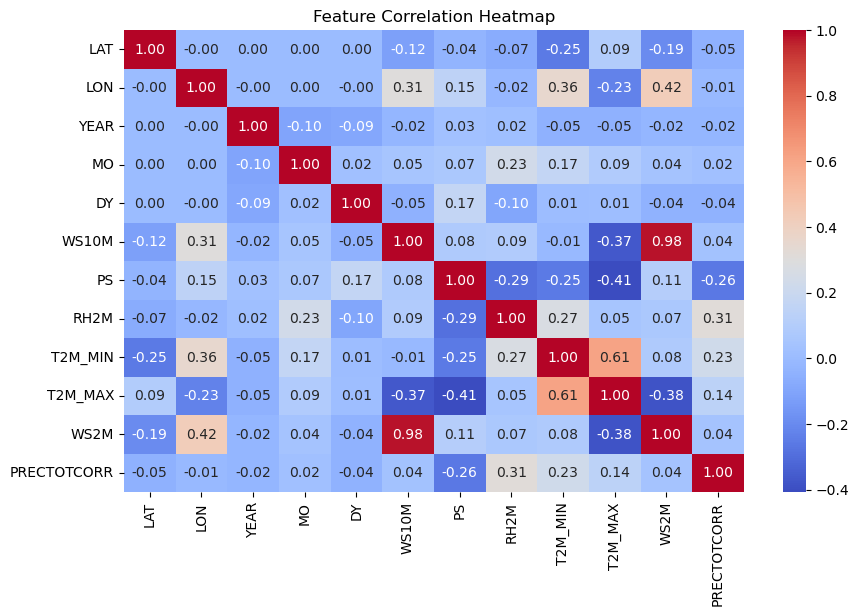

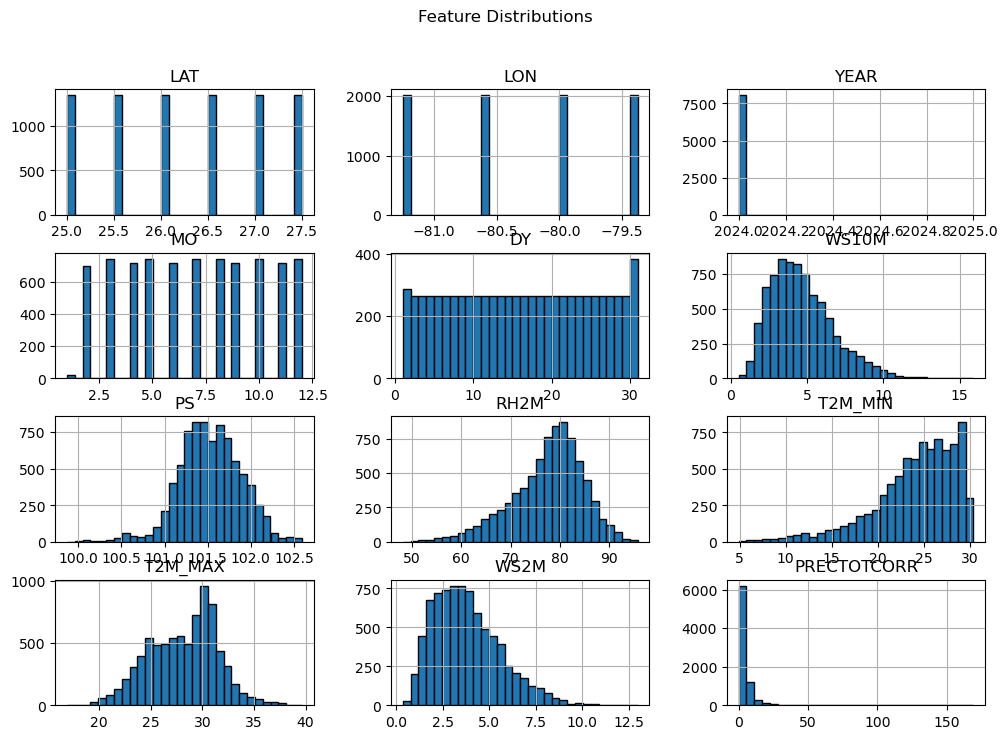

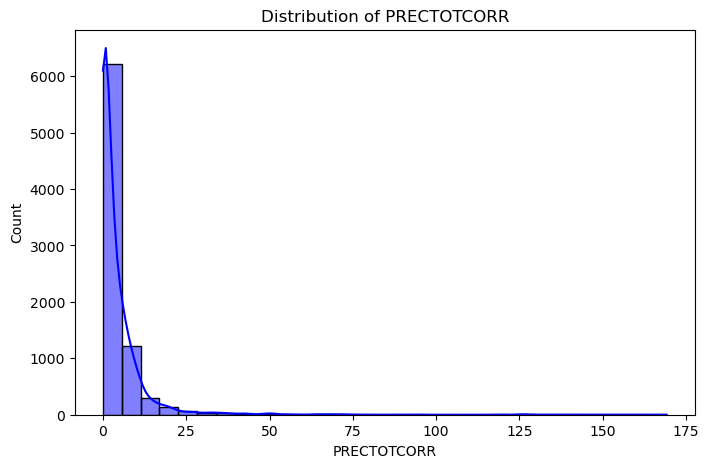

new_df.columns Index(['LAT', 'LON', 'YEAR', 'MO', 'DY', 'WS10M', 'PS', 'RH2M', 'T2M_MIN',
       'T2M_MAX', 'WS2M', 'PRECTOTCORR', 'DATE'],
      dtype='object')
Normalizing column: WS2M
Normalizing column: T2M_MAX
Normalizing column: T2M_MIN
Normalizing column: RH2M
Normalizing column: PRECTOTCORR
Normalizing column: WS10M
Normalizing column: PS


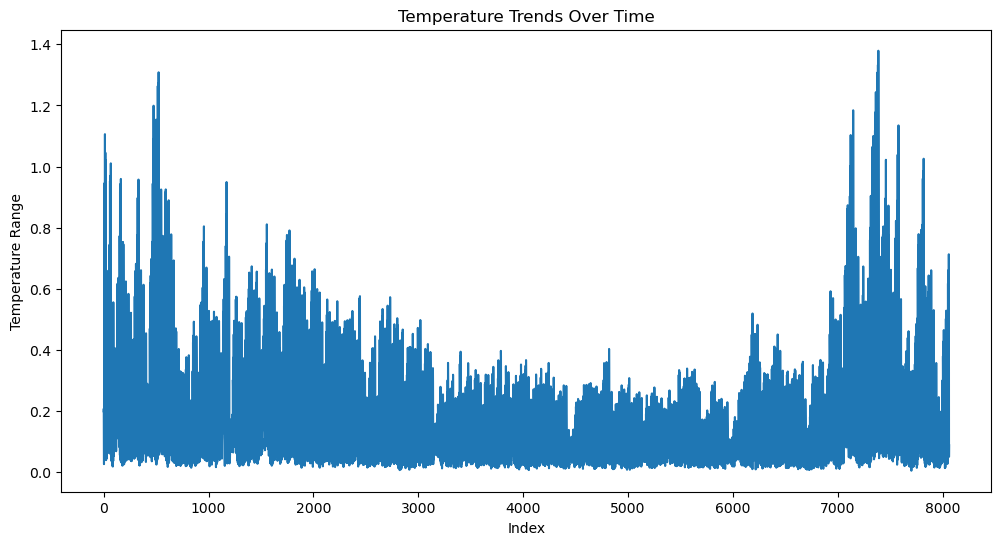

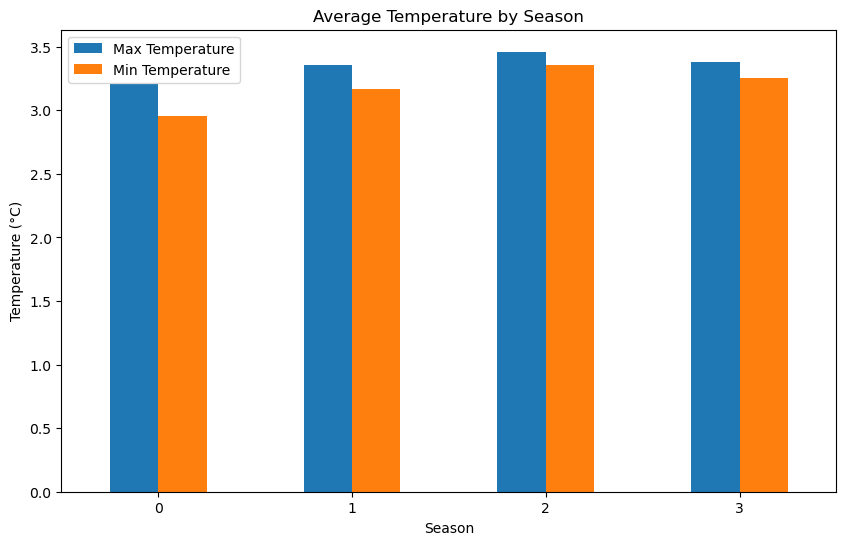

/Users/Hadi/preprocess.py:48: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


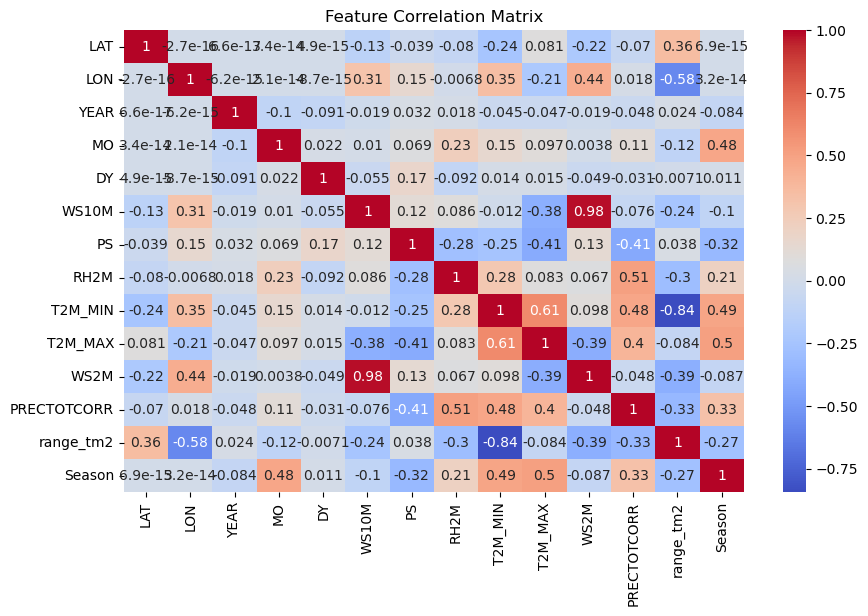

T2M_MAX         12
T2M_MIN        184
WS2M             4
RH2M            88
PRECTOTCORR     43
dtype: int64


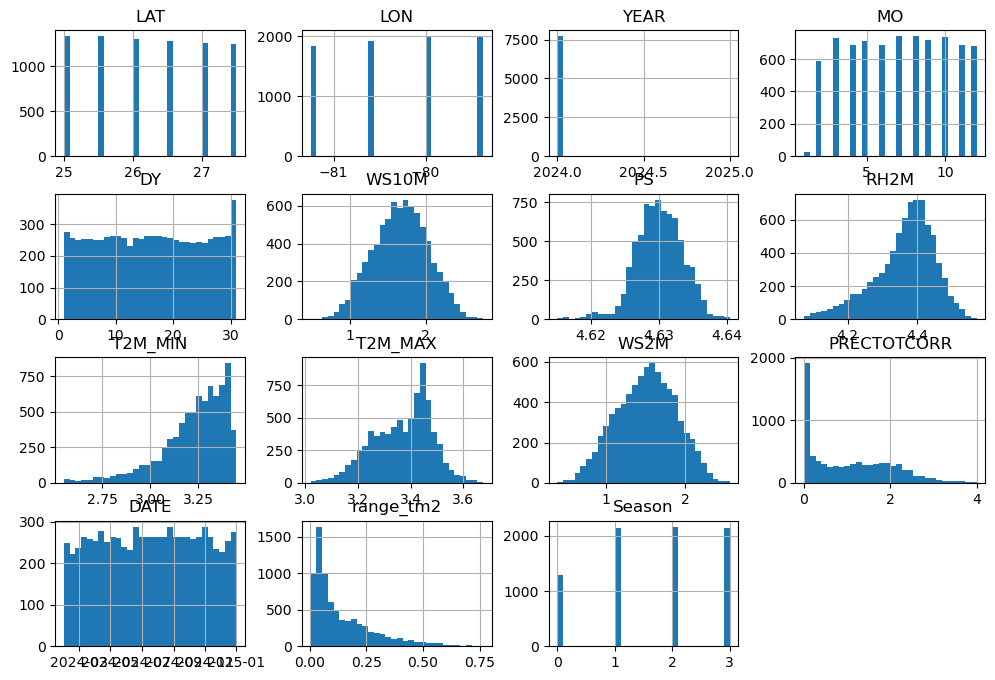

/Users/Hadi/preprocess.py:80: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg = df.groupby('MO').mean()


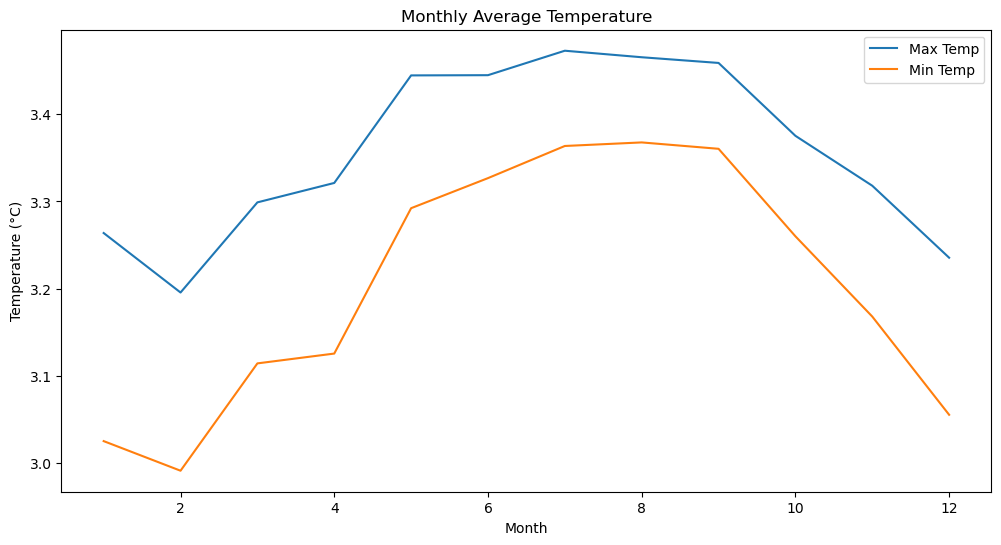

In [3]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from preprocess import (read_csv_file, eda_summary, check_missing_values, plot_correlation_heatmap,

                       plot_feature_distributions, plot_target_distribution,

                       normalize_features, add_date_column, add_temperature_range,

                       create_all_features_csv_file, add_season_feature,

                       group_by_on_features, show_correlation_of_features,

                       normalization_with_z_score, show_plot_of_groupby_features,

                       add_other_features)



from arima import arima_time_series_model

from random_forest_regression import random_forest

from xgboost_regression_model import xgboost_model







# File paths

file_paths = {

    "Wind Speed at 10 Meters": "Wind Speed at 10 Meters.csv",

    "Surface Pressure": "Surface Pressure.csv",

    "Precipitation": "Precipitation.csv",

    "Relative Humidity at 2 Meters": "Relative Humidity at 2 Meters.csv",

    "Temperature at 2 Meters Minimum": "Temperature at 2 Meters Mini.csv",

    "Temperature at 2 Meters Maximum": "Temperature at 2 Meters Max.csv",

    "Wind Speed at 2 Meters": "Wind Speed at 2 Meters.csv",

}



# Example usage

if __name__ == "__main__":





    df_with_all_feature = create_all_features_csv_file(file_paths=file_paths)



    eda_summary(df_with_all_feature)

    check_missing_values(df_with_all_feature)





    plot_correlation_heatmap(df_with_all_feature)

    plot_feature_distributions(df_with_all_feature)

    plot_target_distribution(df_with_all_feature, "PRECTOTCORR")

    df_with_all_feature = add_date_column(df_with_all_feature)

    df_with_all_feature = normalize_features(df_with_all_feature, list_of_columns=['WS2M', 'T2M_MAX', 'T2M_MIN', 'RH2M', 'PRECTOTCORR', 'WS10M', 'PS'])

    df_with_all_feature = add_temperature_range(df_with_all_feature)

    df_with_all_feature = add_season_feature(df_with_all_feature)

    group_by_on_features(df_with_all_feature, feature='Season', based_other_features=['T2M_MAX', 'T2M_MIN'])

    show_correlation_of_features(df_with_all_feature)

    normal_df = normalization_with_z_score(df_with_all_feature) # also you can select part of features by argumant selected_featuares

    show_plot_of_groupby_features(normal_df, 'MO', 'T2M_MAX','T2M_MIN')







    #now train new data on models

    #random_forest(normal_df)

In [6]:
normal_df = add_other_features(normal_df)
#xgboost_model(normal_df)


    LAT     LON  YEAR  MO  DY     WS10M        PS      RH2M   T2M_MIN  \
0  25.0 -81.250  2024   2   1  1.595339  4.633466  4.281515  2.843164   
1  25.0 -80.625  2024   2   1  1.650580  4.633077  4.285516  2.892037   
2  25.0 -80.000  2024   2   1  1.759581  4.632785  4.207376  3.058237   
3  25.0 -79.375  2024   2   1  1.843719  4.632591  4.206780  3.117065   
4  25.5 -81.250  2024   2   1  1.453953  4.633369  4.347176  2.561868   

    T2M_MAX      WS2M  PRECTOTCORR       DATE  range_tm2  Season  T2M_RANGE  \
0  3.042139  1.490654     0.039221 2024-02-01   0.198975       0   0.198975   
1  3.099642  1.547563     0.039221 2024-02-01   0.207605       0   0.207605   
2  3.146735  1.671473     0.076961 2024-02-01   0.088498       0   0.088498   
3  3.143290  1.756132     0.039221 2024-02-01   0.026225       0   0.026225   
4  3.073619  1.308333     0.009950 2024-02-01   0.511751       0   0.511751   

   DAY_OF_YEAR  
0           32  
1           32  
2           32  
3           32  
4

/Users/Hadi/preprocess.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df[['YEAR', 'MO', 'DY']].rename(columns={'YEAR': 'year', 'MO': 'month', 'DY': 'day'}))
/Users/Hadi/preprocess.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["T2M_RANGE"] = df["T2M_MAX"] - df["T2M_MIN"]
/Users/Hadi/preprocess.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [7]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# LSTM Model Definition
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1, :])

# Function to Prepare Data for LSTM
def prepare_lstm_data(df, target_col, sequence_length=10):
    feature_cols = [col for col in df.columns if col not in ['DATE', target_col]]
    df_features = df[feature_cols].values
    df_target = df[target_col].values.reshape(-1, 1)
    
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    df_features = scaler_x.fit_transform(df_features)
    df_target = scaler_y.fit_transform(df_target)
    
    X, y = [], []
    for i in range(len(df_features) - sequence_length):
        X.append(df_features[i:i+sequence_length])
        y.append(df_target[i+sequence_length])
    
    X, y = np.array(X), np.array(y)
    return X, y, scaler_x, scaler_y

# Training Function
def train_lstm_model(df, target_col='PRECTOTCORR', sequence_length=10, epochs=50, batch_size=32, learning_rate=0.001):
    X, y, scaler_x, scaler_y = prepare_lstm_data(df, target_col, sequence_length)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    X_train, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
    y_train, y_test = torch.tensor(y_train, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)
    
    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
    
    input_size = X.shape[2]
    model = LSTMModel(input_size, hidden_size=64, num_layers=2, output_size=1)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            output = model(batch_X)
            loss = criterion(output, batch_y)
            loss.backward()
            optimizer.step()
        
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}')
    
    return model, scaler_x, scaler_y, X_test, y_test, criterion

def test_lstm_model(model, X_test, y_test, scaler_y, criterion):
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
        test_loss = criterion(predictions, y_test).item()
        predictions = predictions.numpy()
    
    predictions = scaler_y.inverse_transform(predictions)
    y_test = scaler_y.inverse_transform(y_test.numpy())
    
    print(f'Test Loss (MSE): {test_loss:.6f}')
    
    plt.figure(figsize=(12, 6))
    plt.plot(y_test, label='Actual Values', color='blue')
    plt.plot(predictions, label='Predicted Values', color='red')
    plt.title('Actual vs Predicted Precipitation')
    plt.xlabel('Time')
    plt.ylabel('Precipitation')
    plt.legend()
    plt.show()


    return test_loss




Epoch [10/50], Loss: 0.024531
Epoch [20/50], Loss: 0.043374
Epoch [30/50], Loss: 0.016595
Epoch [40/50], Loss: 0.008137
Epoch [50/50], Loss: 0.013841
Test Loss (MSE): 0.047376


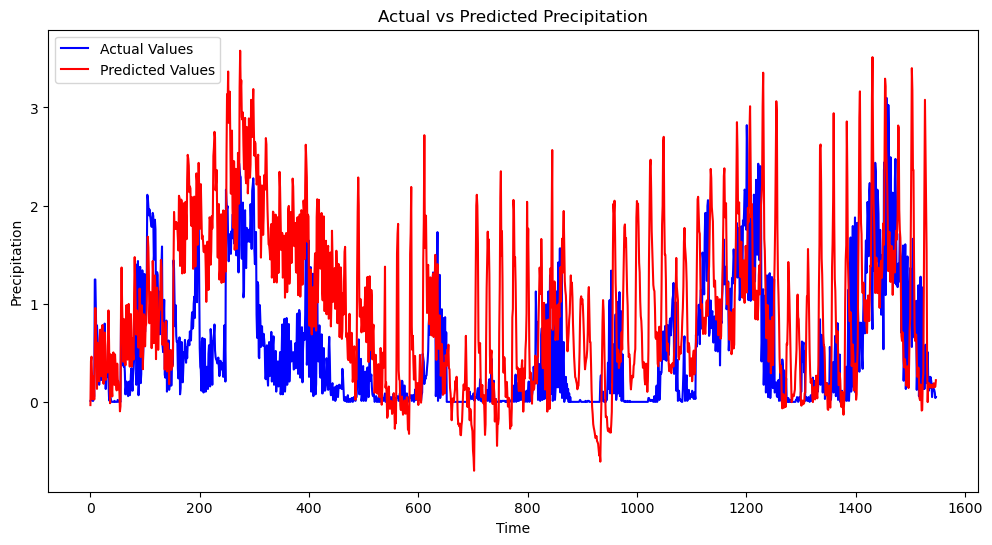

Epoch [10/50], Loss: 0.009304
Epoch [20/50], Loss: 0.010163


KeyboardInterrupt: 

In [10]:
#from test_lstm_model import train_lstm_model, test_lstm_model
for i in range(6):
    model, scaler_x, scaler_y, X_test, y_test, criterion = train_lstm_model(normal_df)
    test_lstm_model(model, X_test, y_test, scaler_y, criterion)

Epoch [10/50], Loss: 0.014919
Epoch [20/50], Loss: 0.016392
Epoch [30/50], Loss: 0.027967
Epoch [40/50], Loss: 0.015595
Epoch [50/50], Loss: 0.007260
Test Loss (MSE): 0.380359


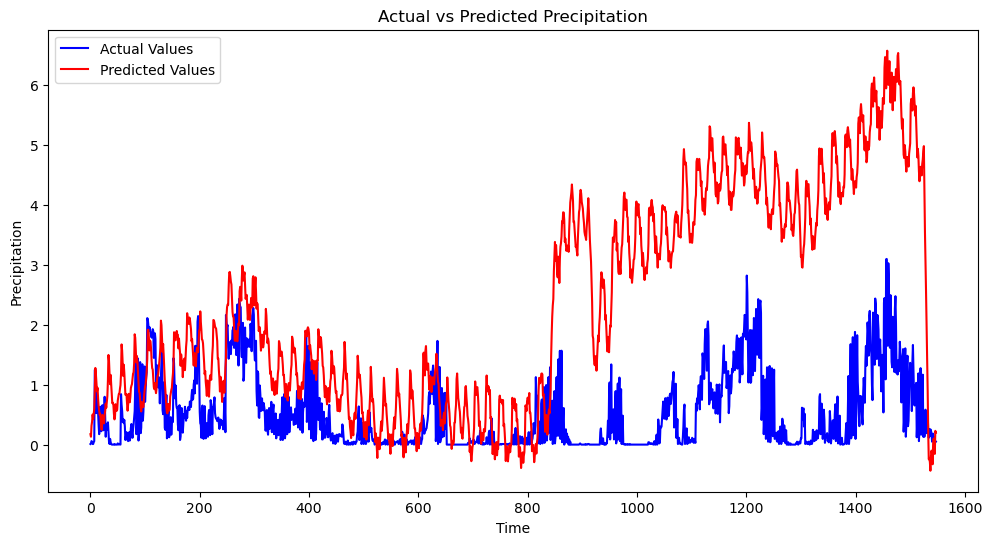

In [11]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# --- GRU Model Definition ---
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        gru_out, _ = self.gru(x)
        return self.fc(gru_out[:, -1, :])

# --- CNN Model Definition ---
class CNN1DModel(nn.Module):
    def __init__(self, input_size, sequence_length):
        super(CNN1DModel, self).__init__()
        self.conv1 = nn.Conv1d(input_size, 64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(64, 1)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # (batch, features, sequence)
        x = self.relu(self.conv1(x))
        x = self.pool(x).squeeze(-1)
        return self.fc(x)

# --- Transformer Model Definition ---
class TransformerModel(nn.Module):
    def __init__(self, input_size, d_model=64, nhead=4, num_layers=2):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_size, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(d_model, 1)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        return self.fc(x[:, -1, :])

# --- Data Preparation Function ---
def prepare_lstm_data(df, target_col, sequence_length=10):
    feature_cols = [col for col in df.columns if col not in ['DATE', target_col]]
    df_features = df[feature_cols].values
    df_target = df[target_col].values.reshape(-1, 1)

    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    df_features = scaler_x.fit_transform(df_features)
    df_target = scaler_y.fit_transform(df_target)

    X, y = [], []
    for i in range(len(df_features) - sequence_length):
        X.append(df_features[i:i+sequence_length])
        y.append(df_target[i+sequence_length])

    X, y = np.array(X), np.array(y)
    return X, y, scaler_x, scaler_y

# --- Training Function ---
def train_model(df, model_type='gru', target_col='PRECTOTCORR', sequence_length=10, epochs=50, batch_size=32, learning_rate=0.001):
    X, y, scaler_x, scaler_y = prepare_lstm_data(df, target_col, sequence_length)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    X_train, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
    y_train, y_test = torch.tensor(y_train, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)

    input_size = X.shape[2]
    if model_type == 'gru':
        model = GRUModel(input_size, hidden_size=64, num_layers=2, output_size=1)
    elif model_type == 'cnn':
        model = CNN1DModel(input_size, sequence_length)
    elif model_type == 'transformer':
        model = TransformerModel(input_size)
    else:
        raise ValueError("Invalid model_type. Choose from 'gru', 'cnn', or 'transformer'.")

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            output = model(batch_X)
            loss = criterion(output, batch_y)
            loss.backward()
            optimizer.step()

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}')

    return model, scaler_x, scaler_y, X_test, y_test, criterion

# --- Testing Function ---
def test_model(model, X_test, y_test, scaler_y, criterion):
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
        test_loss = criterion(predictions, y_test).item()
        predictions = predictions.numpy()

    predictions = scaler_y.inverse_transform(predictions)
    y_test = scaler_y.inverse_transform(y_test.numpy())

    print(f'Test Loss (MSE): {test_loss:.6f}')

    plt.figure(figsize=(12, 6))
    plt.plot(y_test, label='Actual Values', color='blue')
    plt.plot(predictions, label='Predicted Values', color='red')
    plt.title('Actual vs Predicted Precipitation')
    plt.xlabel('Time')
    plt.ylabel('Precipitation')
    plt.legend()
    plt.show()

    return test_loss

# --- Example Usage ---
if __name__ == "__main__":

    # Choose model_type: 'gru', 'cnn', or 'transformer'
    model, scaler_x, scaler_y, X_test, y_test, criterion = train_model(normal_df, model_type='cnn')
    test_model(model, X_test, y_test, scaler_y, criterion)

Epoch [10/50], Loss: 0.034165
Epoch [20/50], Loss: 0.017297
Epoch [30/50], Loss: 0.008183
Epoch [40/50], Loss: 0.013696
Epoch [50/50], Loss: 0.013852
Test Loss (MSE): 0.126328


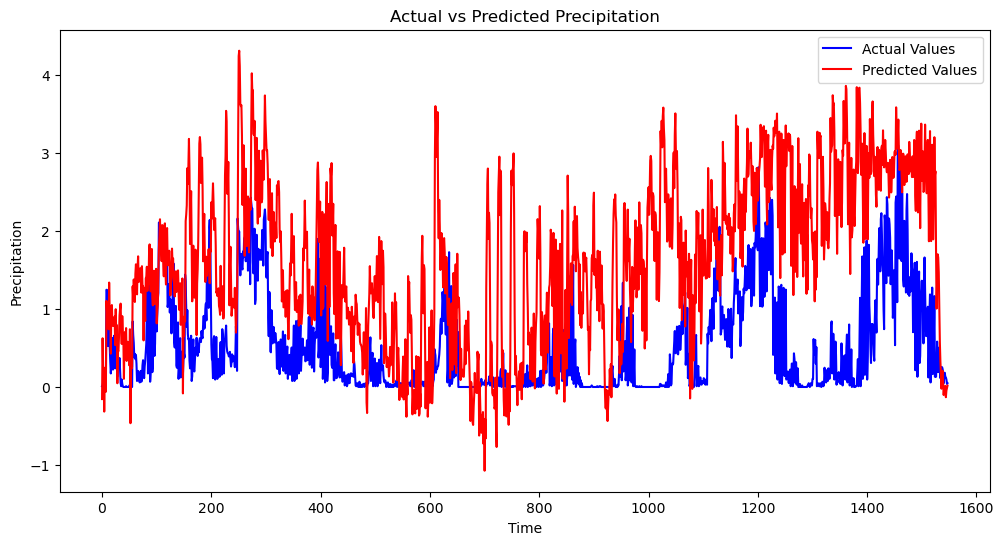

0.12632834911346436

In [13]:
model, scaler_x, scaler_y, X_test, y_test, criterion = train_model(normal_df, model_type='gru')
test_model(model, X_test, y_test, scaler_y, criterion)

Epoch [10/50], Loss: 0.014900
Epoch [20/50], Loss: 0.016473
Epoch [30/50], Loss: 0.005312
Epoch [40/50], Loss: 0.012002
Epoch [50/50], Loss: 0.007365
Test Loss (MSE): 0.089355


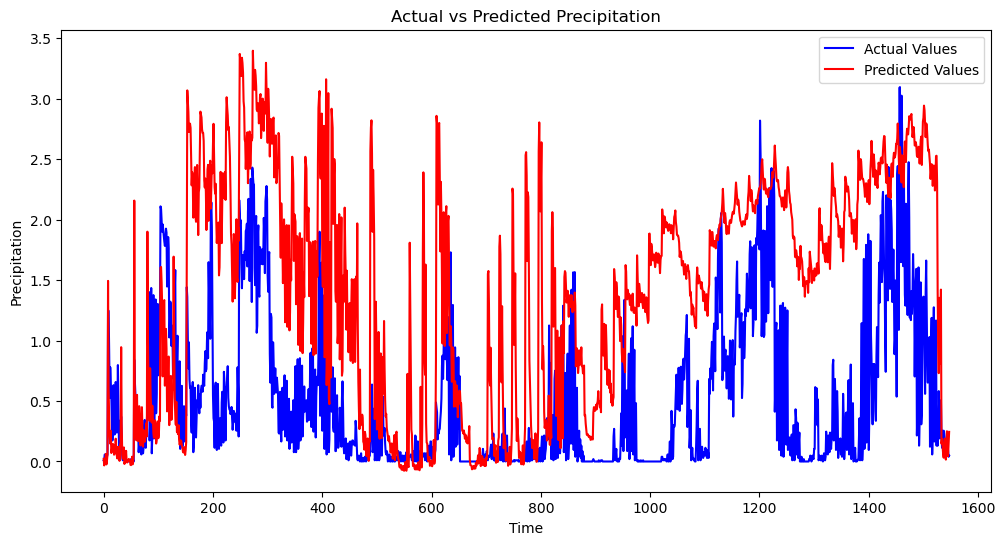

0.0893547460436821

In [14]:
model, scaler_x, scaler_y, X_test, y_test, criterion = train_model(normal_df, model_type='transformer')
test_model(model, X_test, y_test, scaler_y, criterion)